In [34]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical


def gen_sample_grid(npt=200, x_limit = 4, y_limit = 4):
  x1line = np.linspace(0, x_limit, npt)
  x2line = np.linspace(0, y_limit, npt)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npt*npt]).T
  return Xgrid, x1line, x2line

df = pandas.read_csv('http://pogo.software/me4ml/slip_data.csv')

f1 = np.array(df['f1'][:])
f1ang = np.array(df['f1ang'][:])
f2 = np.array(df['f2'][:])
f2ang = np.array(df['f2ang'][:])
m = np.array(df['m'][:])
slips = np.array(df['slips'][:])

## combine these parameters into a single variable
X = np.column_stack((f2, f2ang))
y = np.array(df['slips'][:]) # classes

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Epoch 1/1200
32/32 [==============================] - 1s 1ms/step - loss: 0.4383 - accuracy: 0.8440
Epoch 2/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8440
Epoch 3/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8440
Epoch 4/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8440
Epoch 5/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8440
Epoch 6/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8440
Epoch 7/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8440
Epoch 8/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8440
Epoch 9/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8440
Epoch 10/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8440

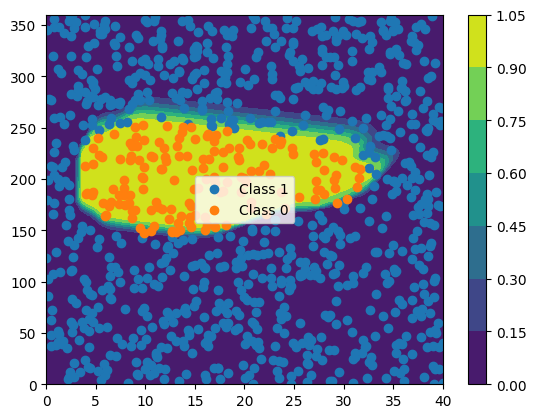

In [42]:
# set up the sequential neural network
model = Sequential()

# Add the layers
model.add(Dense(units=16, activation='tanh', input_dim=2))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=2, activation='softmax'))

opt = Adam(learning_rate=0.001)
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to categorical
#y_binary = to_categorical(y)

# Fit the model
model.fit(X, y, epochs=1200, batch_size=32)

# Generate grid and make predictions
npt = 100
Xgrid, x1line, x2line = gen_sample_grid(npt, 40, 360)

# Predict the model onto Xgrid
predicted_grid = model.predict(Xgrid)
predicted_grid = np.reshape(predicted_grid[:, 0], [npt, npt])
print(predicted_grid)

# Plot the results
plt.contourf(x1line, x2line, predicted_grid, cmap='viridis')
plt.colorbar()
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')
plt.legend()
plt.show()